# Linear models for regression

Notes by Messiah Ataey (github.com/ataey)

In [52]:
# standard imports and configurations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns
%matplotlib inline

Linear models use a linear function of the input features to make predictions:

    ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
    
where

    ŷ is the response variable
    x is the input vector 
    w is the coefficient vector
    b is the bias term

### Ordinary Least Squares

Ordinary least squares is the simplest method for regression. It evaluates the parameters w and b of the above equation that minimize the mean squared error between predictions and ground-truth labels.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mglearn.datasets import make_wave, load_extended_boston

# sample a one-dimensional dataset 
X, y = make_wave(n_samples=45)

# view shape of training data
X.shape

(45, 1)

In [54]:
# partition dataset into train and test subsets; fix random state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

# instantiate linear regression class and fit model on training data
ols = LinearRegression().fit(X_train, y_train)

In [55]:
# view attributes derived from training data
print('Coefficient w: {0}'.format(ols.coef_))
print('Intercept b: {0}'.format(ols.intercept_))

Coefficient w: [0.50951875]
Intercept b: 0.04896058487295224


In [56]:
# view training and test scores (coefficient of determination, R^2)
print('Training score: {:.2f}'.format(ols.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ols.score(X_test, y_test)))

Training score: 0.71
Test set score: 0.44


Based on the above training and test score, the model is underfitting the data. This is probably because the model is too simple, and is unable to capture the particularities of the dataset. In a two-dimensional plane, the model is a straight line. As the data is intrinsically more complicated than a line, the model does not perform well on both the training and test set. The following figure illustrates this notion.

Text(0.5, 1.0, 'Linear regression model on a one-dimensional dataset')

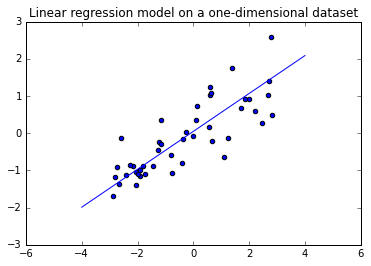

In [57]:
# plot the one-dimensional dataset
plt.scatter(X, y)
# plot the predicted model
plt.plot(np.linspace(-4, 4), ols.predict(np.linspace(-4, 4).reshape(-1,1)))
plt.title('Linear regression model on a one-dimensional dataset')

While linear regression performs quite poorly on low-dimensional datasets like the one above, linear models in fact become more powerful as the number of features (dimensions) grow. The following examples illustrate this.

In [58]:
# load a dataset with a large number of features
X, y = load_extended_boston()

# view the shape of the feature space in 2D (104 features)
X.shape

(506, 104)

In [59]:
# try the same model as before on the new data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
ols = LinearRegression().fit(X_train, y_train)

In [60]:
print('Training set score: {:.2f}'.format(ols.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ols.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.73


As expected, the model performed significantly better on the high-dimensional dataset. Unlike before however, this particular model is overfitting the training data, as there is a large discrepancy between the training and test score. This means that the model seems to be more representative of the randomness of the data than its underlying distribution. Hence, an alternative solution is required that enables one to fine-tune the complexity of the model based on some parameters. The Ridge and Lasso variants of the classical linear regression model make this possible.

### Ridge Regression

Ridge relies on the same method as before to make predictions, however in this case an additional constraint (L2-norm) is applied. The purpose of this constraint is to force the algorithm to choose a set of values (w) for the input features (x) that are diffuse (i.e., spread out) rather than one that is concentrated on a fewer number of features. This process of penalizing the coefficient vector is referred to as regularization. The parameter which controls the degree to which this constraint is applied in scikit-learn is called alpha. A large alpha results in a set of values for the coefficients that are dispersed across the feature space to a higher degree, resulting in a less complex (or more restrictive) model. The opposite is true for a small alpha.

In [61]:
from sklearn.linear_model import Ridge

# instantiate class and fit to training data with default parameters (alpha=1.0)
ridge_default = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge_default.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge_default.score(X_test, y_test)))

Training set score: 0.86
Test set score: 0.83


As shown above, the training score of Ridge with the default parameters is lower than that of the ordinary least squares model from before, while the test score is higher. This confirms the intuition that Ridge will reduce overfitting at the expense of training accuracy. Since we are mainly interested in the ability of a model to generalize (i.e., perform well on new, unseen data), we should generally choose Ridge over the ordinary least squares model.

In [62]:
# try different values of alpha

# alpha=10
ridge_alpha10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge_alpha10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge_alpha10.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.76


In [63]:
# alpha=0.1
ridge_alpha01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge_alpha01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge_alpha01.score(X_test, y_test)))

Training set score: 0.90
Test set score: 0.84


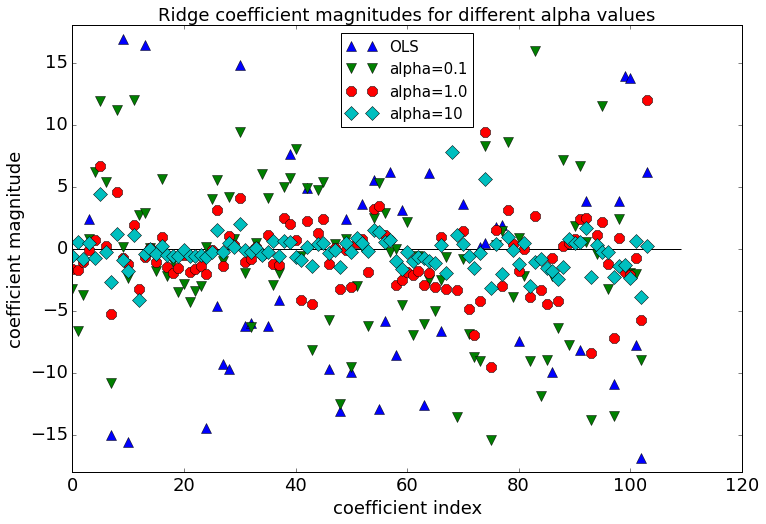

In [70]:
# plot the magnitudes of the Ridge coefficients for different values of alpha
fig, ax = plt.subplots(1, figsize=(12, 8), 
                       subplot_kw={
                                   'xlabel':'coefficient index', 
                                   'ylabel':'coefficient magnitude', 
                                   'title':'Ridge coefficient magnitudes for different alpha values'
                                   })
ax.hlines(0, 0, len(ols.coef_)+5)
ax.set_ylim(-18, 18)

plt.plot(ols.coef_, '^', label='OLS', markersize=10)
plt.plot(ridge_alpha01.coef_, 'v', label='alpha=0.1', markersize=10)
plt.plot(ridge_default.coef_, '8', label='alpha=1.0', markersize=10)
plt.plot(ridge_alpha10.coef_, 'D', label='alpha=10', markersize=10)

plt.legend(loc='upper center')

# plot reformating
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)  
plt.rc('xtick', labelsize=18)    
plt.rc('ytick', labelsize=18)   
plt.rc('legend', fontsize=15)  

From this graph, we can see that for larger values of alpha, the coefficient magnitudes tend to become small, and hence the model becomes less complex. On the other hand, lower values for alpha allows the coefficient magnitudes to vary signficantly, and hence the model is less restricted (or more complex). Notice that for low values of alpha, the model tends to behave similarly to the unregularized ordinary least squares method, which is also plotted.

### Lasso Regression

Lasso is similar to Ridge but instead applies a slightly different constraint (L1-norm). Due to geometric properties, one feature of Lasso is that it forces some of the coefficient magnitudes to become sparse (i.e., exactly zero). Like before, the complexity for Lasso models can be controlled via the alpha parameter.

In [65]:
from sklearn.linear_model import Lasso

# instantiate class and fit to training data with default parameters (alpha=1.0)
lasso_default = Lasso(alpha=1.0).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso_default.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso_default.score(X_test, y_test)))

# see the number of features 'used' by Lasso
print('Number of features used: {0}'.format(np.sum(lasso_default.coef_ != 0)))

Training set score: 0.26
Test set score: 0.24
Number of features used: 3


In [66]:
# try different values of alpha

# alpha=0.01
lasso_alpha01 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso_alpha01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso_alpha01.score(X_test, y_test)))
print('Number of features used: {0}'.format(np.sum(lasso_alpha01.coef_ != 0)))

Training set score: 0.88
Test set score: 0.81
Number of features used: 34


In [67]:
# alpha=0.0001
lasso_alpha0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso_alpha0001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso_alpha0001.score(X_test, y_test)))
print('Number of features used: {0}'.format(np.sum(lasso_alpha0001.coef_ != 0)))

Training set score: 0.93
Test set score: 0.78
Number of features used: 96


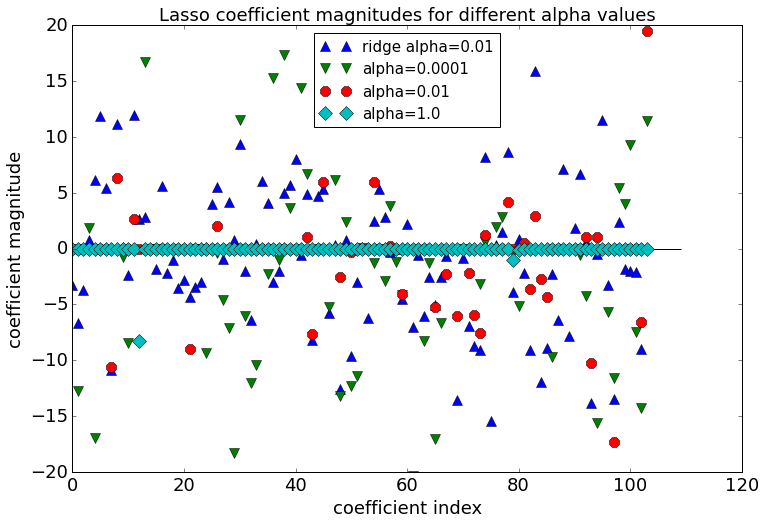

In [69]:
# plot the magnitudes of the set of Lasso coefficients for different values of alpha
fig, ax = plt.subplots(1, figsize=(12, 8), 
                       subplot_kw={
                                   'xlabel':'coefficient index', 
                                   'ylabel':'coefficient magnitude', 
                                   'title':'Lasso coefficient magnitudes for different alpha values'
                                   })
ax.hlines(0, 0, len(ols.coef_)+5)
ax.set_ylim(-20, 20)

plt.plot(ridge_alpha01.coef_, '^', label='ridge alpha=0.01', markersize=10)
plt.plot(lasso_alpha0001.coef_, 'v', label='alpha=0.0001', markersize=10)
plt.plot(lasso_alpha01.coef_, '8', label='alpha=0.01', markersize=10)
plt.plot(lasso_default.coef_, 'D', label='alpha=1.0', markersize=10)

plt.legend(loc='upper center')

# plot reformating
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)  
plt.rc('xtick', labelsize=18)    
plt.rc('ytick', labelsize=18)   
plt.rc('legend', fontsize=15)   

Based on the above graph, we can see that Lasso is more sensitive to the alpha parameter than Ridge. Moreover, we observe that many coefficients are reduced to zero for highly regularized Lasso models. Hence, Lasso peforms a crude form of feature selection, which can be particularly useful if model interpretability is important. Generally speaking however, Ridge is the preferred method when working with regularized regression models.